In [2]:
from google.colab import files
uploaded = files.upload()

Saving student-mat.csv to student-mat (1).csv
Saving student-por.csv to student-por (1).csv


In [3]:
import pandas as pd
import numpy as np
import sklearn
from sklearn import linear_model
from sklearn.utils import shuffle

data = pd.read_csv("student-mat.csv", sep=";")
data2 = pd.read_csv("student-por.csv", sep=";")
print(data2.head())

data2 = data[[]]



data = data[["G1", "G2", "G3", "studytime", "failures", "absences"]]

print(data.head())

predict = "G3" #label

x = np.array(data.drop([predict], 1))
y = np.array(data[predict])

x_train, x_test , y_train, y_test = sklearn.model_selection.train_test_split(x, y, test_size = 0.1)

linear = linear_model.LinearRegression ()

linear.fit(x_train, y_train)
linear.score(x_test, y_test)
acc = linear.score(x_test, y_test)

print(acc)

print('Coefficient: \n', linear.coef_)
print('Intercept: \n', linear.intercept_)

  school sex  age address famsize Pstatus  ...  Walc  health absences  G1  G2  G3
0     GP   F   18       U     GT3       A  ...     1       3        4   0  11  11
1     GP   F   17       U     GT3       T  ...     1       3        2   9  11  11
2     GP   F   15       U     LE3       T  ...     3       3        6  12  13  12
3     GP   F   15       U     GT3       T  ...     1       5        0  14  14  14
4     GP   F   16       U     GT3       T  ...     2       5        0  11  13  13

[5 rows x 33 columns]
   G1  G2  G3  studytime  failures  absences
0   5   6   6          2         0         6
1   5   5   6          2         0         4
2   7   8  10          2         3        10
3  15  14  15          3         0         2
4   6  10  10          2         0         4
0.7749885405862054
Coefficient: 
 [ 0.17390885  0.96398548 -0.24022562 -0.27444037  0.03747758]
Intercept: 
 -1.476020883135881


In [4]:
import pathlib

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers

print(tf.__version__)

2.4.1


In [5]:
column_names = ['G1', 'G2', 'G3', 'studytime', 'failures', 'absences']
raw_dataset = pd.read_csv("student-mat.csv", sep= ";")
dataset = data[column_names]
data.tail()

,G1,G2,G3,studytime,failures,absences
390,9,9,9,2,2,11
391,14,16,16,1,0,3
392,10,8,7,1,3,3
393,11,12,10,1,0,0
394,8,9,9,1,0,5


In [6]:
dataset.isna().sum

<bound method DataFrame.sum of         G1     G2     G3  studytime  failures  absences
0    False  False  False      False     False     False
1    False  False  False      False     False     False
2    False  False  False      False     False     False
3    False  False  False      False     False     False
4    False  False  False      False     False     False
..     ...    ...    ...        ...       ...       ...
390  False  False  False      False     False     False
391  False  False  False      False     False     False
392  False  False  False      False     False     False
393  False  False  False      False     False     False
394  False  False  False      False     False     False

[395 rows x 6 columns]>

In [7]:
train_dataset = dataset.sample( frac=0.8, random_state=0)
test_dataset = dataset.drop( train_dataset.index)

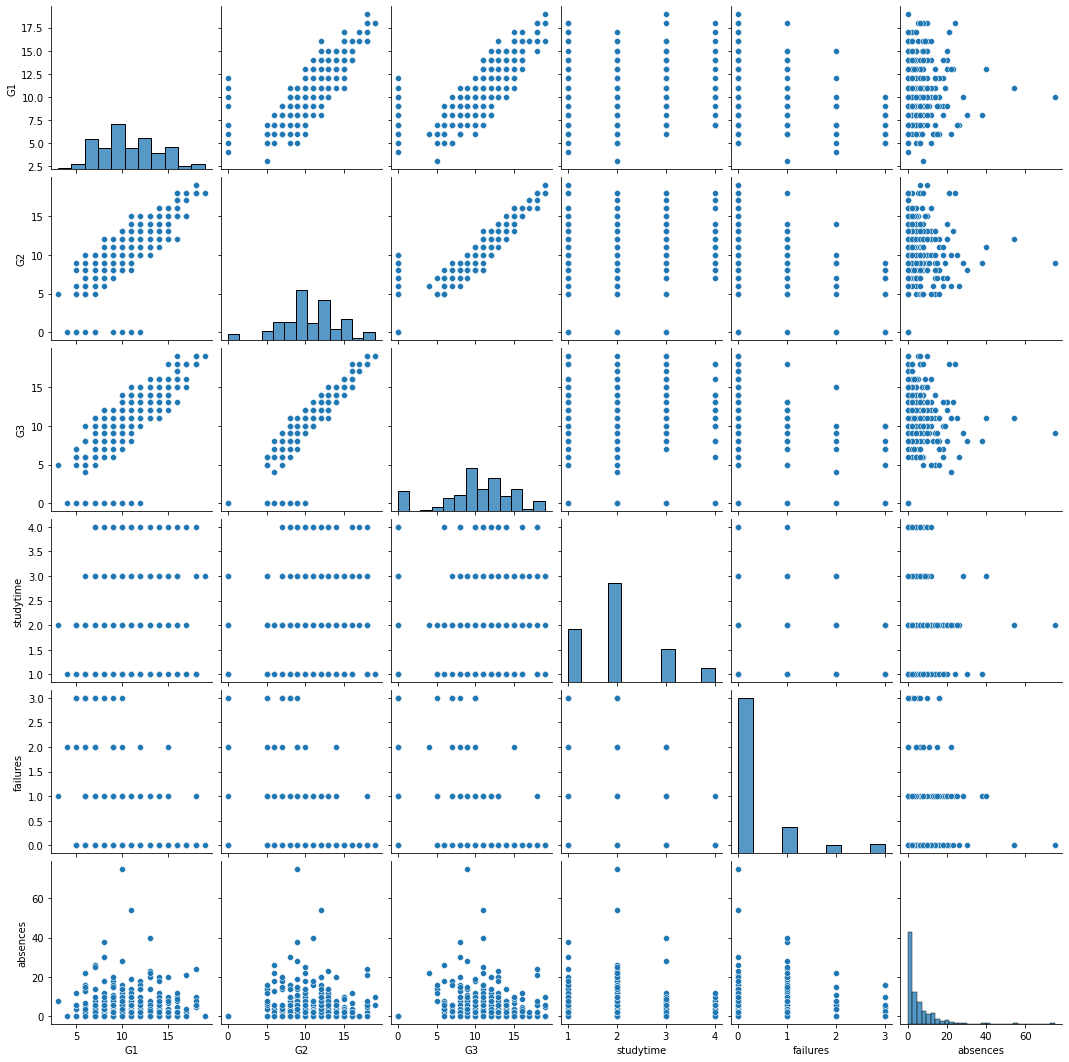

In [8]:
sns.pairplot( train_dataset[['G1', 'G2', 'G3', 'studytime', 'failures', 'absences']])

In [9]:
train_stats = train_dataset.describe()
train_stats.pop("G3")
train_stats = train_stats.transpose()
train_stats

,count,mean,std,min,25%,50%,75%,max
G1,316.0,10.768987,3.277696,3.0,8.0,10.0,13.0,19.0
G2,316.0,10.623418,3.722172,0.0,8.0,10.0,13.0,19.0
studytime,316.0,2.037975,0.842416,1.0,1.0,2.0,2.0,4.0
failures,316.0,0.348101,0.759509,0.0,0.0,0.0,0.0,3.0
absences,316.0,5.655063,8.045387,0.0,0.0,4.0,8.0,75.0


In [10]:
train_labels = train_dataset.pop("G3")
test_labels = test_dataset.pop("G3")

In [11]:
def norm(x):
  return (x - train_stats['mean']) / train_stats['std']
normed_train_data = norm(train_dataset)
normed_test_data = norm(test_dataset)
normed_test_data

,G1,G2,studytime,failures,absences
9,0.985757,1.175814,-0.045078,-0.458324,-0.702895
25,-1.454982,-0.436148,-1.232141,2.174957,1.037232
28,0.070480,0.101173,-0.045078,-0.458324,-0.205716
31,1.901035,1.444475,-0.045078,-0.458324,-0.702895
32,1.901035,1.444475,-0.045078,-0.458324,-0.702895
...,...,...,...,...,...
365,-0.234612,-0.167488,-0.045078,-0.458324,-0.205716
367,-1.149889,-1.242129,-1.232141,0.858316,-0.702895
379,-0.234612,-0.167488,-0.045078,-0.458324,1.410117
381,-1.149889,-1.242129,-1.232141,-0.458324,-0.081421


In [12]:
def build_model():
  model = keras.Sequential([
    layers.Dense(64, activation='relu', input_shape=[len(train_dataset.keys())]), #Tienes una activación Relu
    layers.Dense(64, activation='relu'),
    layers.Dense(1) #Activación linear, esto es lo que queremos
  ])

  optimizer = tf.keras.optimizers.RMSprop(0.001) #RMS es el optimizador

  model.compile(loss='mse',
                optimizer=optimizer,
                metrics=['mae', 'mse']) #mse =mean square error, las metricas sirven para ver que tan bien nuestro modelo esta trabajando mae =mean absolute value
  return model

In [13]:
model = build_model()

In [14]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 64)                384       
_________________________________________________________________
dense_1 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 65        
Total params: 4,609
Trainable params: 4,609
Non-trainable params: 0
_________________________________________________________________


In [15]:
example_batch = normed_train_data[:10]
example_result = model.predict(example_batch)
example_result

array([[-0.01538847],
       [ 0.03405402],
       [-0.08613476],
       [ 0.1266612 ],
       [ 0.07766699],
       [-0.02587681],
       [ 0.05295644],
       [-0.06493643],
       [-0.19164063],
       [ 0.00127994]], dtype=float32)

In [16]:
# Display training progress by printing a single dot for each completed epoch
class PrintDot(keras.callbacks.Callback): #plotea un punto para saber que esta procesando los datos
  def on_epoch_end(self, epoch, logs):
    if epoch % 100 == 0: print('')
    print('.', end='')

EPOCHS = 1000

history = model.fit(
  normed_train_data, train_labels,
  epochs=EPOCHS, validation_split = 0.2, verbose=0,
  callbacks=[PrintDot()])


....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
..........................................................................................

In [17]:
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.tail()

,loss,mae,mse,val_loss,val_mae,val_mse,epoch
995,0.670855,0.485742,0.670855,3.184608,1.199967,3.184608,995
996,0.648335,0.477833,0.648335,3.141812,1.226435,3.141812,996
997,0.675138,0.482637,0.675138,3.026309,1.180405,3.026309,997
998,0.756214,0.514121,0.756214,3.147424,1.180761,3.147424,998
999,0.629773,0.450898,0.629773,3.298540,1.206021,3.298540,999


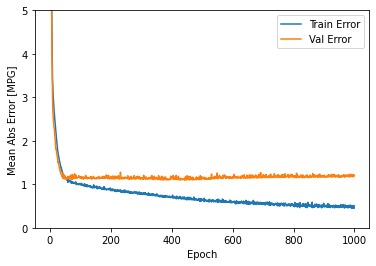

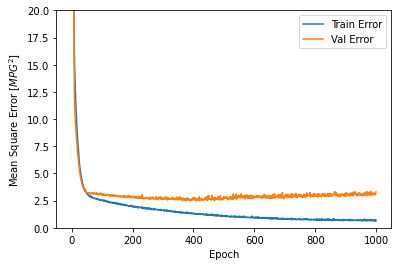

In [18]:
def plot_history(history):
  hist = pd.DataFrame(history.history)
  hist['epoch'] = history.epoch

  plt.figure()
  plt.xlabel('Epoch')
  plt.ylabel('Mean Abs Error [MPG]')
  plt.plot(hist['epoch'], hist['mae'],
           label='Train Error')
  plt.plot(hist['epoch'], hist['val_mae'],
           label = 'Val Error')
  plt.ylim([0,5])
  plt.legend()

  plt.figure()
  plt.xlabel('Epoch')
  plt.ylabel('Mean Square Error [$MPG^2$]')
  plt.plot(hist['epoch'], hist['mse'],
           label='Train Error')
  plt.plot(hist['epoch'], hist['val_mse'],
           label = 'Val Error')
  plt.ylim([0,20])
  plt.legend()
  plt.show()


plot_history(history)


.............................................................................................

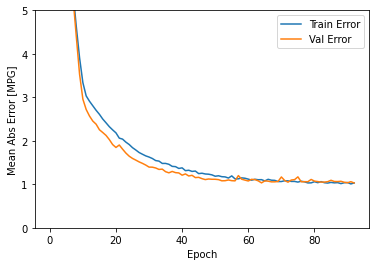

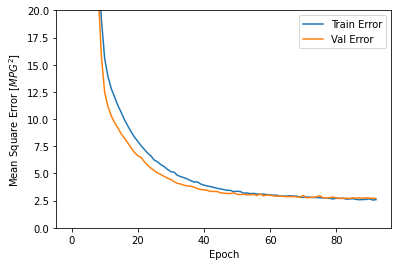

In [19]:
model = build_model()

# The patience parameter is the amount of epochs to check for improvement
early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)

history = model.fit(normed_train_data, train_labels, epochs=EPOCHS,
                    validation_split = 0.2, verbose=0, callbacks=[early_stop, PrintDot()])

plot_history(history)

In [20]:
loss, mae, mse = model.evaluate(normed_test_data, test_labels, verbose=2)

print("Testing set Mean Abs Error: {:5.2f} G3".format(mae))

3/3 - 0s - loss: 2.2252 - mae: 0.9401 - mse: 2.2252
Testing set Mean Abs Error:  0.94 G3


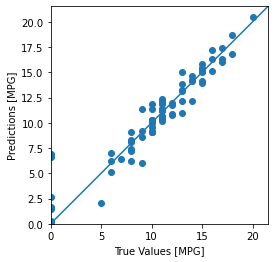

In [21]:
test_predictions = model.predict(normed_test_data).flatten()

plt.scatter(test_labels, test_predictions)
plt.xlabel('True Values [MPG]')
plt.ylabel('Predictions [MPG]')
plt.axis('equal')
plt.axis('square')
plt.xlim([0,plt.xlim()[1]])
plt.ylim([0,plt.ylim()[1]])
_ = plt.plot([-100, 100], [-100, 100])

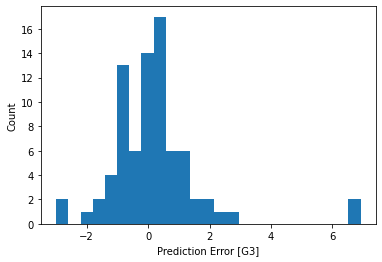

In [22]:
error = test_predictions - test_labels
plt.hist(error, bins = 25)
plt.xlabel("Prediction Error [G3]")
_ = plt.ylabel("Count")